In [123]:
import pandas as pd
import matplotlib.pyplot as plt

In [124]:
df = pd.read_csv("sample_data.csv")

In [125]:
df['y_hat_20_03'] = 20 + 0.3*df['Marketing']

In [126]:
print(df[['Marketing', 'Profit', 'y_hat_20_03']])

    Marketing  Profit  y_hat_20_03
0         472     192        161.6
1         444     192        153.2
2         408     191        142.4
3         383     183        134.9
4         366     166        129.8
5         363     157        128.9
6         128     156         58.4
7         324     156        117.2
8         312     152        113.6
9         305     150        111.5
10        229     146         88.7
11        250     144         95.0
12        250     142         95.0
13        253     134         95.9
14        257     133         97.1
15        262     130         98.6
16        264     127         99.2
17        283     125        104.9
18        295     124        108.5
19          0     123         20.0
20        299     118        109.7
21        300     111        110.0
22        303     110        110.9
23        305     109        111.5
24        141     109         62.3
25        138     107         61.4
26        134     106         60.2
27        353     10

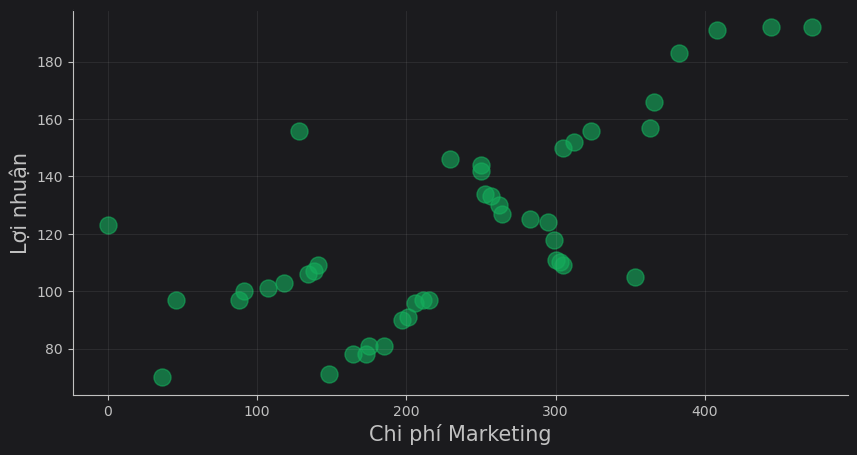

In [127]:
# Draw scatter plot
background_color = '#1B1B1E'
text_color = '#C1C1C1'

fig, ax = plt.subplots(
    figsize = (10, 5),
    facecolor =background_color  # Màu của bên trong chart
)  
ax.set_facecolor(background_color)     # Màu của trục x y

plt.scatter(
    x = df['Marketing'],    # Trục x
    y = df['Profit'],       # Trục y
    marker = 'o',           # Ký hiệu điểm
    color = '#14AE5C',      # Màu của các điểm
    alpha = 0.6,            # Điều chỉnh độ trong suốt (0 đến 1)
    s = 150                 # Kích cỡ điểm
)

# X axis
plt.xlabel("Chi phí Marketing", fontsize=15, c=text_color)
ax.spines['bottom'].set_color(text_color)
ax.spines['top'].set_color(background_color)       # Đổi màu để ẩn khung trên
ax.tick_params(axis='x', colors=text_color)

# Y axis
plt.ylabel("Lợi nhuận", fontsize=15, c=text_color)
ax.spines['left'].set_color(text_color)
ax.spines['right'].set_color(background_color)     # Đổi màu để ẩn cột bên phải
ax.tick_params(axis='y', colors=text_color)

# Grid
plt.grid(c=text_color, alpha=0.1)

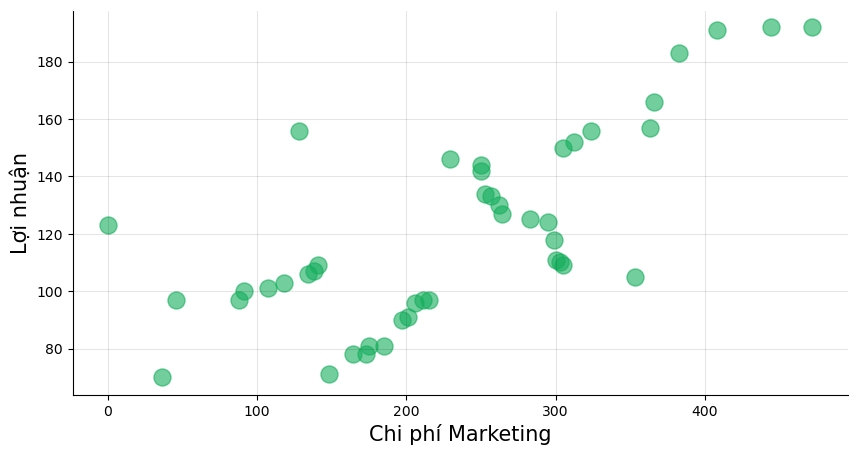

In [128]:
# Draw scatter plot
background_color = 'white'
text_color = 'black'

fig, ax = plt.subplots(
    figsize = (10, 5),
    facecolor =background_color  # Màu của bên trong chart
)  
ax.set_facecolor(background_color)     # Màu của trục x y

plt.scatter(
    x = df['Marketing'],    # Trục x
    y = df['Profit'],       # Trục y
    marker = 'o',           # Ký hiệu điểm
    color = '#14AE5C',      # Màu của các điểm
    alpha = 0.6,            # Điều chỉnh độ trong suốt (0 đến 1)
    s = 150                 # Kích cỡ điểm
)

# X axis
plt.xlabel("Chi phí Marketing", fontsize=15, c=text_color)
ax.spines['bottom'].set_color(text_color)
ax.spines['top'].set_color(background_color)       # Đổi màu để ẩn khung trên
ax.tick_params(axis='x', colors=text_color)

# Y axis
plt.ylabel("Lợi nhuận", fontsize=15, c=text_color)
ax.spines['left'].set_color(text_color)
ax.spines['right'].set_color(background_color)     # Đổi màu để ẩn cột bên phải
ax.tick_params(axis='y', colors=text_color)

# Grid
plt.grid(c=text_color, alpha=0.1)

In [148]:
def cost_function(marketing, profit, w0, w1):
    data_size = len(marketing)
    total_error = 0

    for i in range(data_size):
        total_error += (profit[i] - (w0 + w1*marketing[i]))**2

    return total_error / data_size

In [130]:
def gradient_descent(marketing, profit, w0_input, w1_input, learning_rate):
    w0_gradient = 0
    w1_gradient = 0
    data_size = len(marketing)

    # Tính tổng đạo hàm
    for i in range(data_size):
        # Đạo hàm w0
        w0_gradient += (w0_input + w1_input*marketing[i] - profit[i])

        # Đạo hàm w1
        w1_gradient += marketing[i]*(w0_input + w1_input*marketing[i] - profit[i])

    # Cập nhật giá trị tham số
    w0_new = w0_input - 2 * learning_rate * w0_gradient / data_size
    w1_new = w1_input - 2 * learning_rate * w1_gradient / data_size
    
    return w0_new, w1_new

In [131]:
def train(marketing, profit, w0, w1, learning_rate, loop_count):
    cost_records = []
    w0_records = [w0]
    w1_records = [w1]

    cost = cost_function(marketing, profit, w0, w1)
    print(f"loop=0    w0={w0:.4f}    w1={w1:.4f}    cost={cost:.4f}")
    cost_records.append(cost)


    for loop in range(1, loop_count+1):
        # Cập nhật tham số
        w0, w1 = gradient_descent(marketing, profit, w0, w1, learning_rate)
        w0_records.append(w0)
        w1_records.append(w1)

        # Tính chi phí (độ sai lệch)
        cost = cost_function(marketing, profit, w0, w1)
        cost_records.append(cost)
        
        if loop < 6:
            print(f"loop={loop}    w0={w0:.4f}    w1={w1:.4f}    cost={cost:.4f}")

        # In ra giá trị tại một số vòng lặp
        if loop % 10 == 0:
            print(f"loop={loop}    w0={w0:.4f}    w1={w1:.4f}    cost={cost:.4f}")

    return w0_records, w1_records, cost_records

In [132]:
# Chạy huấn luyện mô hình
w0_records, w1_records, cost_record = train(
    marketing = df['Marketing'].values, 
    profit = df['Profit'].values, 
    w0 = 0, 
    w1 = 0, 
    learning_rate = 0.00001, 
    loop_count = 30
)

loop=0    w0=0.0000    w1=0.0000    cost=15733.8636
loop=1    w0=0.0024    w1=0.6114    cost=2735.1620
loop=2    w0=0.0020    w1=0.4252    cost=1529.4739
loop=3    w0=0.0025    w1=0.4819    cost=1417.6357
loop=4    w0=0.0027    w1=0.4646    cost=1407.2565
loop=5    w0=0.0029    w1=0.4699    cost=1406.2880
loop=10    w0=0.0042    w1=0.4687    cost=1406.1579
loop=20    w0=0.0067    w1=0.4687    cost=1406.0945
loop=30    w0=0.0092    w1=0.4686    cost=1406.0312


In [170]:
def draw_and_save_img(df, w0_records, w1_records, light_mode=True):

    if light_mode:
        background_color = 'white'
        text_color = 'black'
        color_text = 'light'
    else:
        background_color = '#1B1B1E'
        text_color = '#C1C1C1'
        color_text = 'dark'

    for index, (w0, w1) in enumerate(zip(w0_records, w1_records)):
        # -------------------------------------------------------------
        # Update prediction
        df['prediction'] = w0 + w1*df['Marketing']

        # -------------------------------------------------------------
        # Create plots
        fig, axes = plt.subplots(
            nrows=1, ncols=2,
            figsize = (14, 5),
            facecolor = background_color  # Màu của bên trong chart
        )  
        fig.suptitle(f'Vòng lặp {index}', fontsize=20, color=text_color)

        # -------------------------------------------------------------
        # Plot points and trend line
        axes[0].scatter(x = df['Marketing'], y = df['Profit'], marker = 'o', color = '#14AE5C', alpha = 0.6, s = 150)
        axes[0].plot(df['Marketing'], df['prediction'], color = 'red')
        
        # X axis
        axes[0].set_xlabel("Chi phí Marketing", fontsize=15, color=text_color)
        axes[0].spines['bottom'].set_color(text_color)
        axes[0].spines['top'].set_color(background_color)
        axes[0].tick_params(axis='x', colors=text_color)
        axes[0].set_xlim([-1, 500])

        # Y axis
        axes[0].set_ylabel("Lợi nhuận", fontsize=15, color=text_color)
        axes[0].spines['left'].set_color(text_color)
        axes[0].spines['right'].set_color(background_color)
        axes[0].tick_params(axis='y', colors=text_color)
        axes[0].set_ylim([-1, 250])
        axes[0].set_facecolor(background_color)     # Màu của trục x y

        # Grid
        axes[0].grid(c=text_color, alpha=0.2)

        # Title
        axes[0].set_title(f'Phương trình dự đoán h(x) = {w0:.4f} + {w1:.4f}*Mkt', fontsize=15, color=text_color)

        # -------------------------------------------------------------
        # Plot cost function
        axes[1].plot(range(0, index+1), cost_record, marker='o')

        axes[1].set_title(f'Tổng độ lệch (chi phí)', fontsize=15, color=text_color)
        # -------------------------------------------------------------
        # Save plot
        plt.tight_layout()
        plt.savefig(f'chart-{color_text}-{index:02}.png')
        plt.close(fig)

In [171]:
draw_and_save_img(df, w0_records, w1_records, light_mode=True)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))

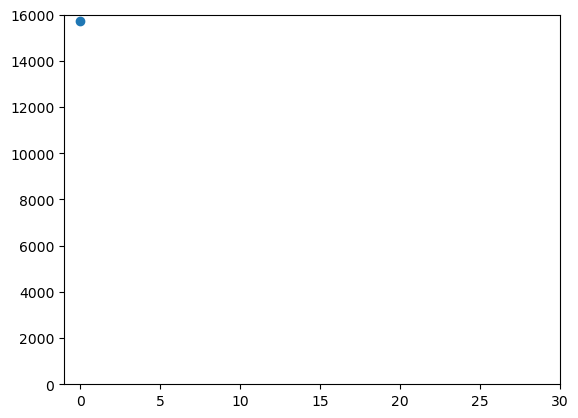

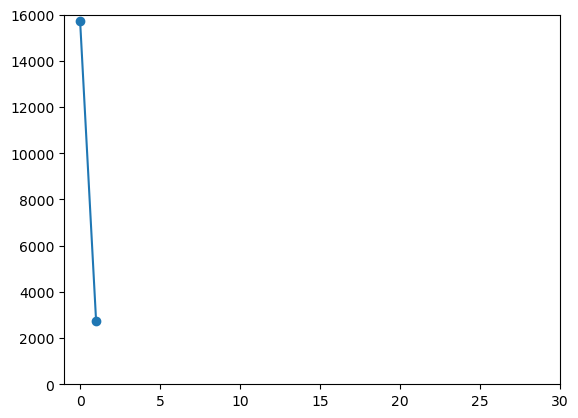

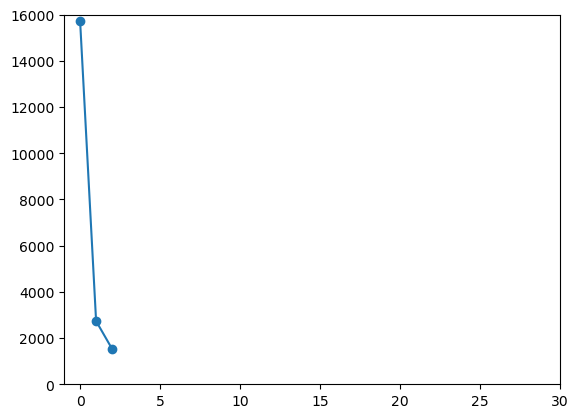

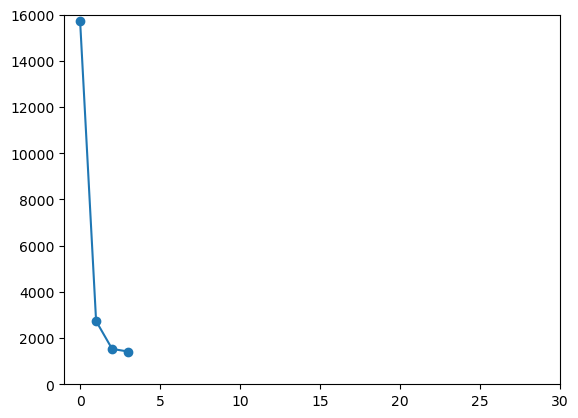

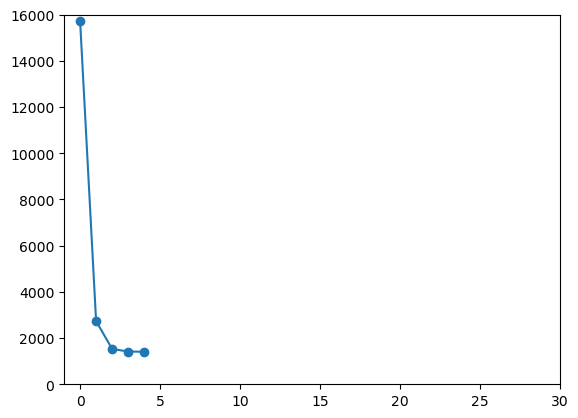

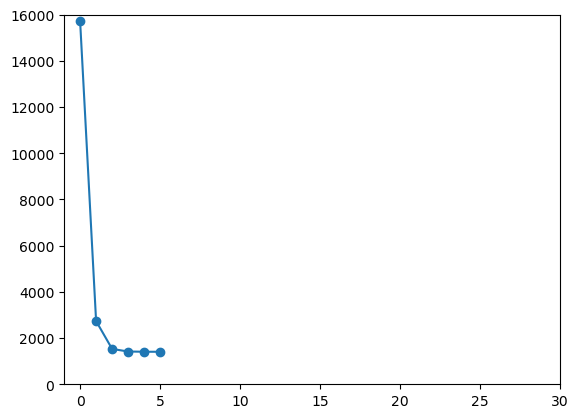

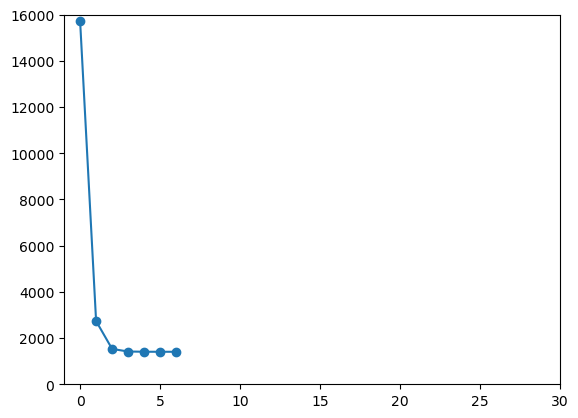

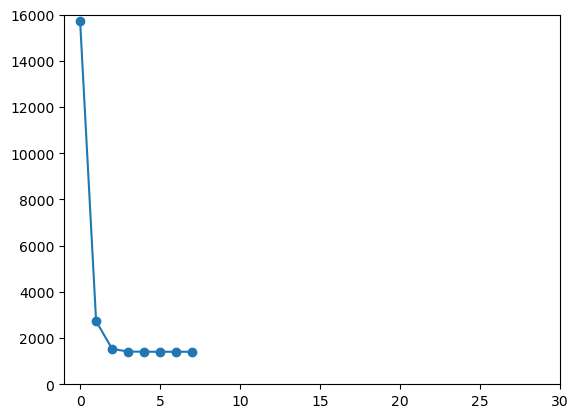

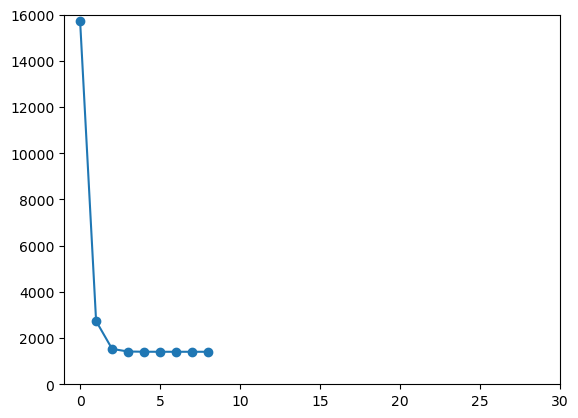

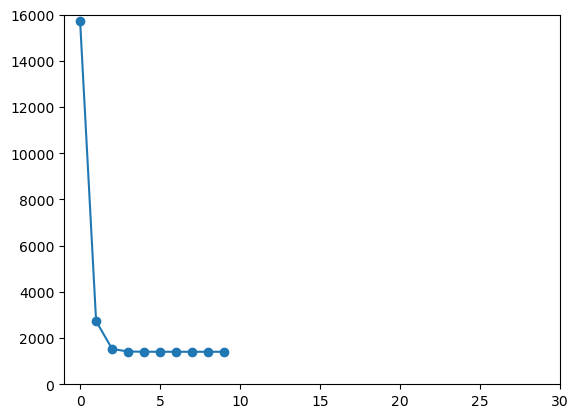

In [178]:
for i in range(10):
    plt.plot(range(0, i+1), cost_record[:i+1], marker='o')
    plt.ylim(0, 16000)
    plt.xlim([-1,30])
    plt.ylim([-1,16000])
    plt.show()

In [ ]:
def cost_function(marketing, profit, w0, w1)

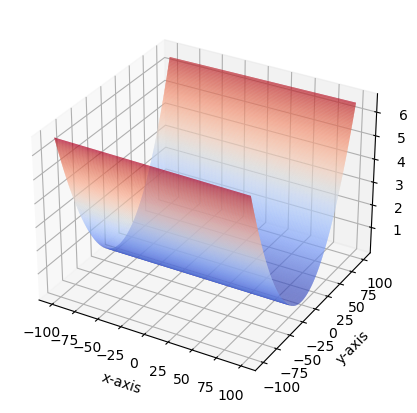

In [151]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(projection='3d')   # Create the axes

# Data
X = np.linspace(-100, 100, 1000)
Y = np.linspace(-100, 100, 1000)
X, Y = np.meshgrid(X, Y)
Z = cost_function(df['Marketing'], df['Profit'], X, Y)

# Plot the 3d surface
surface = ax.plot_surface(X, Y, Z,
                          cmap=cm.coolwarm,
                          rstride = 2,
                          cstride = 2)

# Set some labels
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

plt.show()

Gradient Descent: -3.73, 82.80 73
Least Squares: -3.71, 82.90


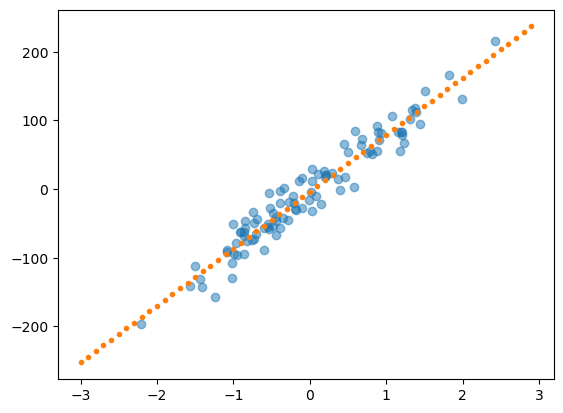

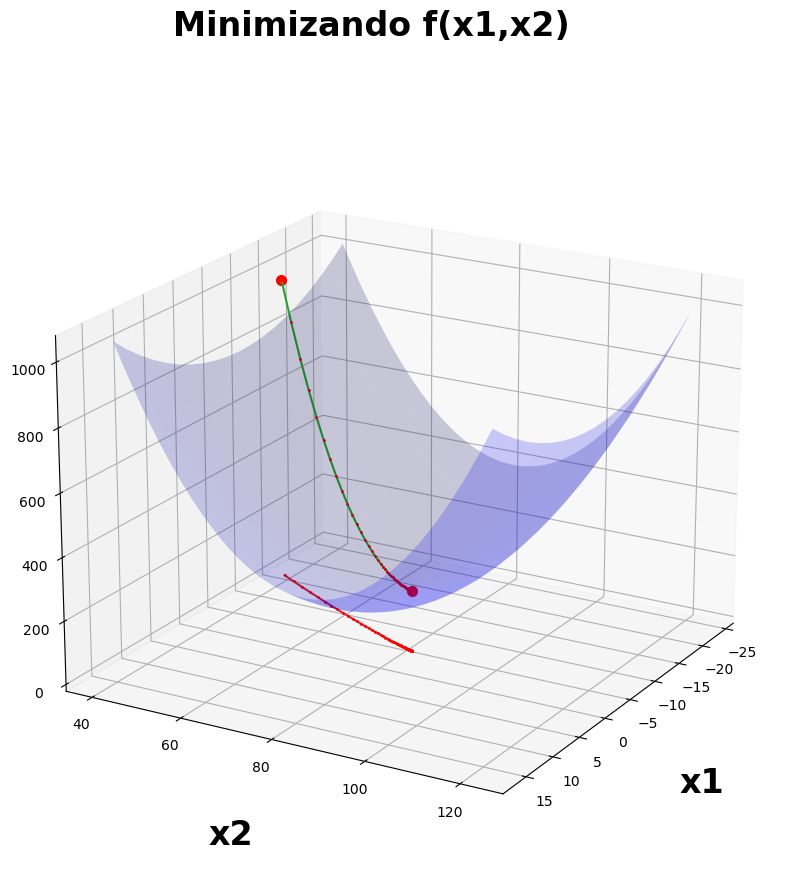

In [156]:
#code adapted from http://tillbergmann.com/blog/python-gradient-descent.html

%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats 

from sklearn.datasets import make_regression 

x, y = make_regression(n_samples = 100, 
                       n_features=1, 
                       n_informative=1, 
                       noise=20,
                       random_state=2017)
x = x.flatten()
slope, intercept, _,_,_ = stats.linregress(x,y)
best_fit = np.vectorize(lambda x: x * slope + intercept)
plt.plot(x,y, 'o', alpha=0.5)
grid = np.arange(-3,3,0.1)
plt.plot(grid,best_fit(grid), '.')

def gradient_descent(x, y, theta_init, step=0.001, maxsteps=0, precision=0.001, ):
    costs = []
    m = y.size # number of data points
    theta = theta_init
    history = [] # to store all thetas
    preds = []
    counter = 0
    oldcost = 0
    pred = np.dot(x, theta)
    error = pred - y 
    currentcost = np.sum(error ** 2) / (2 * m)
    preds.append(pred)
    costs.append(currentcost)
    history.append(theta)
    counter+=1
    while abs(currentcost - oldcost) > precision:
        oldcost=currentcost
        gradient = x.T.dot(error)/m 
        theta = theta - step * gradient  # update
        history.append(theta)
        
        pred = np.dot(x, theta)
        error = pred - y 
        currentcost = np.sum(error ** 2) / (2 * m)
        costs.append(currentcost)
        
        if counter % 25 == 0: preds.append(pred)
        counter+=1
        if maxsteps:
            if counter == maxsteps:
                break
        
    return history, costs, preds, counter
xaug = np.c_[np.ones(x.shape[0]), x]
theta_i = [-15, 40] + np.random.rand(2)
history, cost, preds, iters = gradient_descent(xaug, y, theta_i, step=0.1)
theta = history[-1]
print("Gradient Descent: {:.2f}, {:.2f} {:d}".format(theta[0], theta[1], iters))
print("Least Squares: {:.2f}, {:.2f}".format(intercept, slope))


from mpl_toolkits.mplot3d import Axes3D

def error(X, Y, THETA):
    return np.sum((X.dot(THETA) - Y)**2)/(2*Y.size)

ms = np.linspace(theta[0] - 20 , theta[0] + 20, 20)
bs = np.linspace(theta[1] - 40 , theta[1] + 40, 40)

M, B = np.meshgrid(ms, bs)

zs = np.array([error(xaug, y, theta) 
               for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
#ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)


ax.set_xlabel('x1', labelpad=30, fontsize=24, fontweight='bold')
ax.set_ylabel('x2', labelpad=30, fontsize=24, fontweight='bold')
ax.set_zlabel('f(x1,x2)', labelpad=30, fontsize=24, fontweight='bold')
ax.view_init(elev=20., azim=30)
ax.plot([theta[0]], [theta[1]], [cost[-1]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)
ax.plot([history[0][0]], [history[0][1]], [cost[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7)


ax.plot([t[0] for t in history], [t[1] for t in history], cost , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)
ax.plot([t[0] for t in history], [t[1] for t in history], 0 , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2)

fig.suptitle("Minimizando f(x1,x2)", fontsize=24, fontweight='bold')
plt.savefig("Minimization_image.png")